In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [4]:
tx_trans_z0_1_mod = xr.open_dataset(input_path + 'tx_trans_z0_1_mod.nc').tx_trans_z0_1_mod/1e6/1036
print(tx_trans_z0_1_mod)
tx_trans_z0_1_slope_mod = xr.open_dataset(input_path + 'tx_trans_z0_1_slope_mod.nc').tx_trans_z0_1_slope_mod*10/1e6/1036
print(tx_trans_z0_1_slope_mod)
tx_trans_z0_1_p_value_mod = xr.open_dataset(input_path + 'tx_trans_z0_1_p_value_mod.nc').tx_trans_z0_1_p_value_mod
print(tx_trans_z0_1_p_value_mod)
tx_trans_z0_1_std_err_mod = xr.open_dataset(input_path + 'tx_trans_z0_1_std_err_mod.nc').tx_trans_z0_1_std_err_mod*10
print(tx_trans_z0_1_std_err_mod)

tx_trans_z0_025_mod = xr.open_dataset(input_path + 'tx_trans_z0_025_mod.nc').tx_trans_z0_025_mod/1e6/1036
print(tx_trans_z0_025_mod)
tx_trans_z0_025_slope_mod = xr.open_dataset(input_path + 'tx_trans_z0_025_slope_mod.nc').tx_trans_z0_025_slope_mod*10/1e6/1036
print(tx_trans_z0_025_slope_mod)
tx_trans_z0_025_p_value_mod = xr.open_dataset(input_path + 'tx_trans_z0_025_p_value_mod.nc').tx_trans_z0_025_p_value_mod
print(tx_trans_z0_025_p_value_mod)
tx_trans_z0_025_std_err_mod = xr.open_dataset(input_path + 'tx_trans_z0_025_std_err_mod.nc').tx_trans_z0_025_std_err_mod*10
print(tx_trans_z0_025_std_err_mod)

tx_trans_z0_01_mod = xr.open_dataset(input_path + 'tx_trans_z0_01_mod.nc').tx_trans_z0_01_mod/1e6/1036
print(tx_trans_z0_01_mod)
tx_trans_z0_01_slope_mod = xr.open_dataset(input_path + 'tx_trans_z0_01_slope_mod.nc').tx_trans_z0_01_slope_mod*10/1e6/1036
print(tx_trans_z0_01_slope_mod)
tx_trans_z0_01_p_value_mod = xr.open_dataset(input_path + 'tx_trans_z0_01_p_value_mod.nc').tx_trans_z0_01_p_value_mod
print(tx_trans_z0_01_p_value_mod)
tx_trans_z0_01_std_err_mod = xr.open_dataset(input_path + 'tx_trans_z0_01_std_err_mod.nc').tx_trans_z0_01_std_err_mod*10
print(tx_trans_z0_01_std_err_mod)

<xarray.DataArray 'tx_trans_z0_1_mod' (yt_ocean: 186, xu_ocean: 91, year: 25)>
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e

<xarray.DataArray 'tx_trans_z0_01_mod' (yt_ocean: 1422, xu_ocean: 900, year: 25)>
array([[[  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        ...,
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ]],

       [[  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        ...,
        [  0.      ,   0. 

In [5]:
# tx_trans_z0_obs = xr.open_dataset(input_path + 'tx_trans_z0_obs.nc').tx_trans_z0_obs
# print(tx_trans_z0_obs)
# tx_trans_z0_slope_obs = xr.open_dataset(input_path + 'tx_trans_z0_slope_obs.nc').tx_trans_z0_slope_obs*10
# print(tx_trans_z0_slope_obs)
# tx_trans_z0_p_value_obs = xr.open_dataset(input_path + 'tx_trans_z0_p_value_obs.nc').tx_trans_z0_p_value_obs
# print(tx_trans_z0_p_value_obs)
# tx_trans_z0_std_err_obs = xr.open_dataset(input_path + 'tx_trans_z0_std_err_obs.nc').tx_trans_z0_std_err_obs*10
# print(tx_trans_z0_std_err_obs)

# tx_trans_z0_1_obs = xr.open_dataset(input_path + 'tx_trans_z0_1_obs.nc').tx_trans_z0_1_obs
# print(tx_trans_z0_1_obs)
# tx_trans_z0_1_slope_obs = xr.open_dataset(input_path + 'tx_trans_z0_1_slope_obs.nc').tx_trans_z0_1_slope_obs*10
# print(tx_trans_z0_1_slope_obs)
# tx_trans_z0_1_p_value_obs = xr.open_dataset(input_path + 'tx_trans_z0_1_p_value_obs.nc').tx_trans_z0_1_p_value_obs
# print(tx_trans_z0_1_p_value_obs)
# tx_trans_z0_1_std_err_obs = xr.open_dataset(input_path + 'tx_trans_z0_1_std_err_obs.nc').tx_trans_z0_1_std_err_obs*10
# print(tx_trans_z0_1_std_err_obs)

# tx_trans_z0_025_obs = xr.open_dataset(input_path + 'tx_trans_z0_025_obs.nc').tx_trans_z0_025_obs
# print(tx_trans_z0_025_obs)
# tx_trans_z0_025_slope_obs = xr.open_dataset(input_path + 'tx_trans_z0_025_slope_obs.nc').tx_trans_z0_025_slope_obs*10
# print(tx_trans_z0_025_slope_obs)
# tx_trans_z0_025_p_value_obs = xr.open_dataset(input_path + 'tx_trans_z0_025_p_value_obs.nc').tx_trans_z0_025_p_value_obs
# print(tx_trans_z0_025_p_value_obs)
# tx_trans_z0_025_std_err_obs = xr.open_dataset(input_path + 'tx_trans_z0_025_std_err_obs.nc').tx_trans_z0_025_std_err_obs*10
# print(tx_trans_z0_025_std_err_obs)

# tx_trans_z0_01_obs = xr.open_dataset(input_path + 'tx_trans_z0_01_obs.nc').tx_trans_z0_01_obs
# print(tx_trans_z0_01_obs)
# tx_trans_z0_01_slope_obs = xr.open_dataset(input_path + 'tx_trans_z0_01_slope_obs.nc').tx_trans_z0_01_slope_obs*10
# print(tx_trans_z0_01_slope_obs)
# tx_trans_z0_01_p_value_obs = xr.open_dataset(input_path + 'tx_trans_z0_01_p_value_obs.nc').tx_trans_z0_01_p_value_obs
# print(tx_trans_z0_01_p_value_obs)
# tx_trans_z0_01_std_err_obs = xr.open_dataset(input_path + 'tx_trans_z0_01_std_err_obs.nc').tx_trans_z0_01_std_err_obs*10
# print(tx_trans_z0_01_std_err_obs)

<xarray.DataArray 'temp_z0_obs' (lat: 94, lon: 94, year: 25)>
[220900 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -71.5 -70.5 -69.5 -68.5 -67.5 ... 18.5 19.5 20.5 21.5
  * lon      (lon) float32 -271.5 -270.5 -269.5 -268.5 ... -180.5 -179.5 -178.5
  * year     (year) int64 1993 1994 1995 1996 1997 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_z0_slope_obs' (lat: 94, lon: 94)>
array([[      nan,       nan,       nan, ..., -0.024173, -0.032237, -0.032628],
       [      nan,       nan,       nan, ..., -0.044449, -0.056147, -0.059141],
       [      nan,       nan,       nan, ..., -0.059615, -0.072295, -0.077494],
       ...,
       [ 0.087609,  0.103634,  0.114205, ...,  0.223179,  0.209544,  0.208897],
       [ 0.046718,  0.064038,  0.068698, ...,  0.207756,  0.192186,  0.194   ],
       [-0.00127 ,  0.009192, -0.007103, ...,  0.191563,  0.173949,  0.177576]])
Coordinates:
  * lat      (lat) float32 -71.5 -70.5 -69.5 -68.5 -67.5 ... 18.5 19.5 20.5 21.5
  * 

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.29347826086956524, y1=0.88)
[0.125, 0.5368181818181819, 0.31097826086956526, 0.88]
Bbox(x0=0.3271739130434783, y0=0.5368181818181819, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.5368181818181819, 0.5131521739130435, 0.88]
Bbox(x0=0.5293478260869566, y0=0.5368181818181819, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.5368181818181819, 0.7153260869565218, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.29347826086956524, y1=0.46818181818181825)
[0.125, 0.20000000000000012, 0.31097826086956526, 0.5431818181818182]
Bbox(x0=0.3271739130434783, y0=0.1250000000000001, x1=0.4956521739130435, y1=0.46818181818181825)
[0.3271739130434783, 0.20000000000000012, 0.5131521739130435, 0.5431818181818182]
Bbox(x0=0.5293478260869566, y0=0.1250000000000001, x1=0.6978260869565218, y1=0.46818181818181825)
[0.5293478260869566, 0.20000000000000012, 0.7153260869565218, 0.5431818181818182]


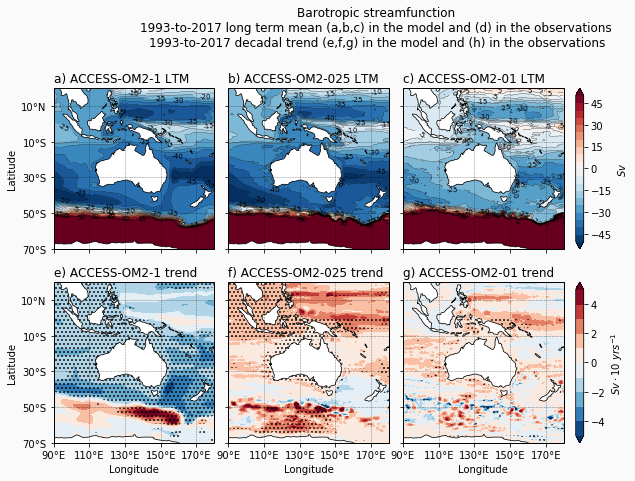

In [6]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Barotropic streamfunction ' +
    '\n1993-to-2017 long term mean (a,b,c) in the model and ' +
    '(d) in the observations ' +
    '\n1993-to-2017 decadal trend (e,f,g) in the model and ' +
    '(h) in the observations',
    x=0.5,y=0.99, ha='center')

row=2
col=4

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-50,50,5)
cmap = plt.cm.RdBu_r
data = 130 - tx_trans_z0_1_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-')
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=7)
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = 130 - tx_trans_z0_025_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-')
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=7)
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = 130 - tx_trans_z0_01_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-')
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=7)
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 LTM', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
# print(pos_plot)
# # levels=arange(0,30,2)
# # cmap = plt.cm.Spectral
# data = 130 - tx_trans_z0_obs.mean('year')
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('d) NOAA OISST V2 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$Sv$', cax=axins)

ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
levels=arange(-5,5,1)
cmap = plt.cm.RdBu_r
data = -tx_trans_z0_1_slope_mod
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = tx_trans_z0_1_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = -tx_trans_z0_025_slope_mod
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = tx_trans_z0_025_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = -tx_trans_z0_01_slope_mod
plot = plt.contourf(data.xu_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = tx_trans_z0_01_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

# ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
# print(pos_plot)
# # levels=arange(-1,1,0.1)
# # cmap = plt.cm.RdBu_r
# data = -tx_trans_z0_slope_obs
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = tx_trans_z0_p_value_obs
# plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('h) NOAA OISST V2 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$Sv \cdot 10\ yrs^{-1}$', cax=axins)

# savefigure('psi_absolute')

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.29347826086956524, y1=0.88)
[0.125, 0.5368181818181819, 0.31097826086956526, 0.88]
Bbox(x0=0.3271739130434783, y0=0.5368181818181819, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.5368181818181819, 0.5131521739130435, 0.88]
Bbox(x0=0.5293478260869566, y0=0.5368181818181819, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.5368181818181819, 0.7153260869565218, 0.88]
Bbox(x0=0.7315217391304348, y0=0.5368181818181819, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.5368181818181819, 1.0075, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.29347826086956524, y1=0.46818181818181825)
[0.125, 0.20000000000000012, 0.31097826086956526, 0.5431818181818182]
Bbox(x0=0.3271739130434783, y0=0.1250000000000001, x1=0.4956521739130435, y1=0.46818181818181825)
[0.3271739130434783, 0.20000000000000012, 0.5131521739130435, 0.5431818181818182]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:181: RuntimeWarning: invalid value encountered in less
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:213: RuntimeWarning: invalid value encountered in less


Bbox(x0=0.5293478260869566, y0=0.1250000000000001, x1=0.6978260869565218, y1=0.46818181818181825)
[0.5293478260869566, 0.20000000000000012, 0.7153260869565218, 0.5431818181818182]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in less


Bbox(x0=0.7315217391304348, y0=0.1250000000000001, x1=0.9000000000000001, y1=0.46818181818181825)
[0.8215217391304348, 0.20000000000000012, 1.0075, 0.5431818181818182]


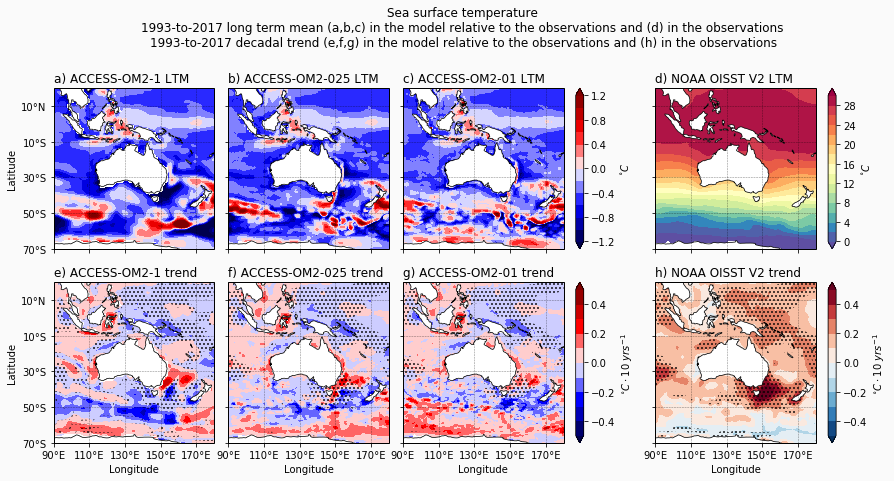

In [46]:
# def bbox(pos):
#     return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
# from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# def arange(start,end,stride=1):
#     return np.arange(start,end+0.00000001,stride)

# def savefigure(fname):
#     output_dir = '/home/561/erd561/figures/Australia/'
#     fig_name = nb_name[:-6]
#     fig_dir = output_dir + fig_name

#     output_ls = os.listdir(output_dir)
#     if fig_name not in output_ls:
#         os.mkdir(fig_dir) 
#     plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
#                 dpi=300, bbox_inches="tight")


# land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
#                                     edgecolor='black',
#                                     facecolor='white',
#                                     linewidth=0.75)

# # fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
# fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
# matplotlib.rcParams.update({'font.size': 10})    

# plt.suptitle(
#     r'Sea surface tx_transerature ' +
#     '\n1993-to-2017 long term mean (a,b,c) in the model relative to the observations and ' +
#     '(d) in the observations ' +
#     '\n1993-to-2017 decadal trend (e,f,g) in the model relative to the observations and ' +
#     '(h) in the observations',
#     x=0.6,y=0.99, ha='center')

# row=2
# col=4

# ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
# print(pos_plot)
# levels=arange(-1.2,1.2,0.2)
# cmap = plt.cm.seismic
# data = tx_trans_z0_1_mod.mean('year')
# data_values = tx_trans_z0_1_mod.mean('year').values - tx_trans_z0_1_obs.mean('year').values
# plot = plt.contourf(data.xu_ocean, data.yt_ocean, data_values,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('a) ACCESS-OM2-1 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
# # ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
# print(pos_plot)
# # levels=arange(0,30,2)
# # cmap = plt.cm.Spectral
# data = tx_trans_z0_025_mod.mean('year')
# data_values = tx_trans_z0_025_mod.mean('year').values - tx_trans_z0_025_obs.mean('year').values
# plot = plt.contourf(data.xu_ocean, data.yt_ocean, data_values,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('b) ACCESS-OM2-025 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
# print(pos_plot)
# # levels=arange(0,30,2)
# # cmap = plt.cm.Spectral
# data = tx_trans_z0_01_mod.mean('year')
# data_values = tx_trans_z0_01_mod.mean('year').values - tx_trans_z0_01_obs.mean('year').values
# plot = plt.contourf(data.xu_ocean, data.yt_ocean, data_values,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('c) ACCESS-OM2-01 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# axins = inset_axes(ax,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="100%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.075, 0, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='vertical',
#                     label=r'$^{\circ}C$', cax=axins)

# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1] 
# print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
# data = tx_trans_z0_obs.mean('year')
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('d) NOAA OISST V2 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
# ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# axins = inset_axes(ax,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="100%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.075, 0, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='vertical',
#                     label=r'$^{\circ}C$', cax=axins)

# ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
# print(pos_plot)
# levels=arange(-0.5,0.5,0.1)
# cmap = plt.cm.seismic
# data = tx_trans_z0_1_slope_mod
# data_values = tx_trans_z0_1_slope_mod.values - tx_trans_z0_1_slope_obs.values
# plot = plt.contourf(data.xu_ocean, data.yt_ocean, data_values,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.1]
# # cmap2 = plt.cm.RdBu_r
# # data2 = tx_trans_z0_1_p_value_mod
# data2 = tx_trans_z0_1_p_value_mod.where(tx_trans_z0_1_p_value_obs.values<0.05,1)
# plot2 = plt.contourf(data.xu_ocean, data.yt_ocean, data2_values, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('e) ACCESS-OM2-1 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
# # ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)

# ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
# print(pos_plot)
# # levels=arange(-1,1,0.1)
# # cmap = plt.cm.RdBu_r
# data = tx_trans_z0_025_slope_mod
# data_values = tx_trans_z0_025_slope_mod.values - tx_trans_z0_025_slope_obs.values
# plot = plt.contourf(data.xu_ocean, data.yt_ocean, data_values,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# # levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = tx_trans_z0_025_p_value_mod.where(tx_trans_z0_025_p_value_obs.values<0.05,1)
# plot2 = plt.contourf(data.xu_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('f) ACCESS-OM2-025 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)

# ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0+0.075, pos.x1+0.0175, pos.y1+0.075] 
# print(pos_plot)
# # levels=arange(-1,1,0.1)
# # cmap = plt.cm.RdBu_r
# data = tx_trans_z0_01_slope_mod
# data_values = tx_trans_z0_01_slope_mod.values - tx_trans_z0_01_slope_obs.values
# plot = plt.contourf(data.xu_ocean, data.yt_ocean, data_values,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = tx_trans_z0_01_p_value_mod.where(tx_trans_z0_01_p_value_obs.values<0.05,1)
# plot2 = plt.contourf(data.xu_ocean, data.yt_ocean, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('g) ACCESS-OM2-01 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# axins = inset_axes(ax,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="100%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.075, 0, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='vertical',
#                     label=r'$^{\circ}C \cdot 10\ yrs^{-1}$', cax=axins)

# ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0+0.09, pos.y0+0.075, pos.x1+0.1075, pos.y1+0.075] 
# print(pos_plot)
# levels=arange(-0.5,0.5,0.1)
# cmap = plt.cm.RdBu_r
# data = tx_trans_z0_slope_obs
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# levels2=[0, 0.05]
# # cmap2 = plt.cm.RdBu_r
# data2 = tx_trans_z0_p_value_obs
# plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())
# ax.set_position(bbox(pos_plot))
# ax.set_title('h) NOAA OISST V2 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# axins = inset_axes(ax,
#                    width="5%",  # width = 5% of parent_bbox width
#                    height="100%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.075, 0, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='vertical',
#                     label=r'$^{\circ}C \cdot 10\ yrs^{-1}$', cax=axins)

# # savefigure('SST_relative')